In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use("seaborn-v0_8-whitegrid")

In [7]:
import matplotlib.font_manager as fm

# 설치되어 있는 폰트 목록을 가져오기
font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")

# 한글 폰트만 가져오기
korean_fonts=[]

for font in font_list:
    if "gulim" in font.lower() or "malgun" in font.lower():
        korean_fonts.append(font)


In [8]:
korean_fonts

['C:\\Windows\\Fonts\\NGULIM.TTF',
 'C:\\Windows\\Fonts\\gulim.ttc',
 'C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\Windows\\Fonts\\malgun.ttf']

In [10]:
# 폰트 설정
font_path = "C:\\Windows\\Fonts\\NGULIM.TTF"
font_prob = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prob.get_name())

## 1차 함수 그려보기

In [11]:
def linear_fc(x):
    w0=2
    w1=3
    fx = w0*x+w1
    return fx

In [12]:
linear_fc(3)

9

In [15]:
linear_fc(np.arange(-3, 3.1, 0.1))

array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
       -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
       -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
       -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
        2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
        1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
        1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
        2.60000000e+00,  2.80000000e+00,  3.00000000e+00,  3.20000000e+00,
        3.40000000e+00,  3.60000000e+00,  3.80000000e+00,  4.00000000e+00,
        4.20000000e+00,  4.40000000e+00,  4.60000000e+00,  4.80000000e+00,
        5.00000000e+00,  5.20000000e+00,  5.40000000e+00,  5.60000000e+00,
        5.80000000e+00,  6.00000000e+00,  6.20000000e+00,  6.40000000e+00,
        6.60000000e+00,  6.80000000e+00,  7.00000000e+00,  7.20000000e+00,
        7.40000000e+00,  

In [13]:
linear_fc(np.array([1,2,3,4]))

array([ 5,  7,  9, 11])

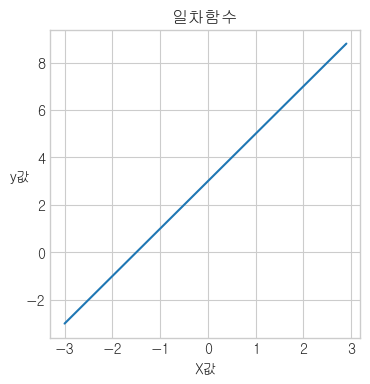

In [18]:
# 일차함수 차트 그려보기
x = np.arange(-3, 3, 0.1)
y = linear_fc(x)
plt.figure(figsize=(4,4))
plt.plot(x,y)
plt.title("일차함수")
plt.xlabel("X값")
plt.ylabel("y값", rotation=0)
plt.show()

### 2.이차함수 그려보기
- $y = ax^2 + bx + c$

In [19]:
def quadratic_fc(x):
    w0 = 2
    w1 = 3
    w2 = 4
    fx = (w0 * x **2) + (w1 * x) + w2
    return fx

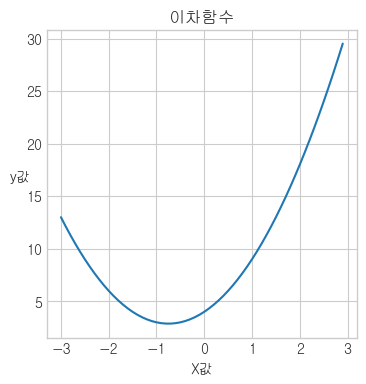

In [20]:
# 일차함수 차트 그려보기
x = np.arange(-3, 3, 0.1)
y = quadratic_fc(x)
plt.figure(figsize=(4,4))
plt.plot(x,y)
plt.title("이차함수")
plt.xlabel("X값")
plt.ylabel("y값", rotation=0)
plt.show()

3. 다양한 w 값에 따른 손실함수 계산
    - 비용 함수 $MSE$는 다음과 같이 정의될때 :
        - $MSE = (w_1 - 2)^2 + (w_2 - 3)^2 + (w_3 - 4)^2$<br>
        - $\frac{\partial MSE}{\partial w_1} = 2(w_1 - 2) = 0, \; w_1 = 2$<br>
        - $\frac{\partial MSE}{\partial w_2} = 2(w_2 - 3) = 0, \; w_2 = 3$<br>
        - $\frac{\partial MSE}{\partial w_3} = 2(w_3 - 4) = 0, \; w_3 = 4$

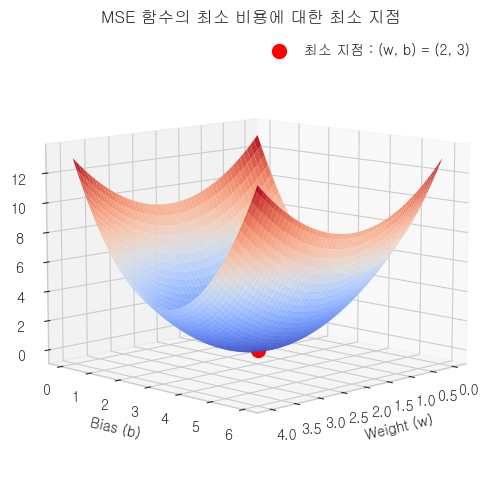

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# 가중치(w)와 절편(b)의 범위 설정
w_range = np.linspace(0, 4, 100)
b_range = np.linspace(0, 6, 100)
W, B = np.meshgrid(w_range, b_range)

# 비용 함수 계산
MSE = (W - 2)**2 + (B - 3)**2

# 비용 함수 그래프
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W, B, MSE, cmap='coolwarm')

# 최소 지점 표시
min_w, min_b = 2, 3
ax.scatter(min_w, min_b, 0, color='red', s=100, label='최소 지점 : (w, b) = (2, 3)')
ax.legend()

# 축 레이블 설정
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('MSE')

# 뷰 시점 설정
ax.view_init(elev=10, azim=45)

plt.title('MSE 함수의 최소 비용에 대한 최소 지점')

plt.show()

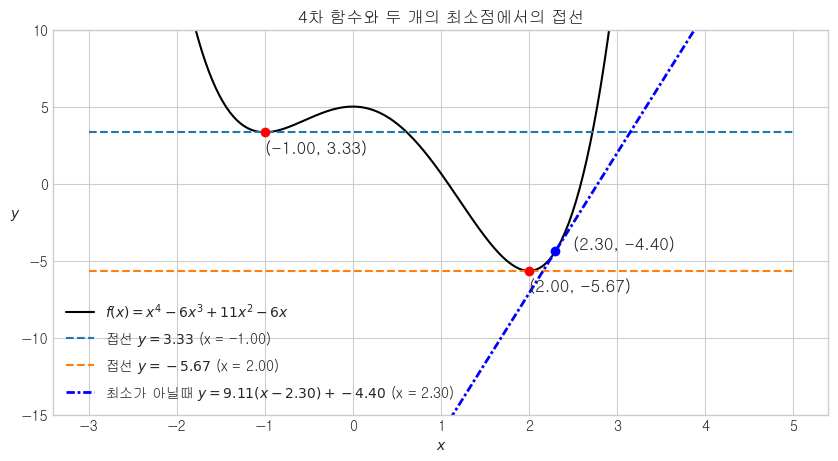

In [22]:
from scipy.optimize import fsolve

# 계수 정의
a = 1
b = -4/3
c = -4
d = 0
e = 5

# 함수 정의
def f(x):
    return (a * x**4) + (b * x**3) + (c * x**2) + (d * x) + e

# 함수의 미분
def f_prime(x):
    return (4 * a * x**3) + (3 * b * x**2) + (2 * c * x) + d

# 극소값 찾기 (1차 미분이 0이 되는 지점)
initial_guesses = [-2, 5]
x0_1, x0_2 = fsolve(f_prime, initial_guesses)
y0_1 = f(x0_1)
y0_2 = f(x0_2)
slope_1 = f_prime(x0_1)
slope_2 = f_prime(x0_2)

# 접선의 방정식
def tangent_line(x, x0, y0, slope):
    return slope * (x - x0) + y0

# x 값의 범위 설정
x = np.linspace(-3, 5, 400)
y = f(x)
tangent_y_1 = tangent_line(x, x0_1, y0_1, slope_1)
tangent_y_2 = tangent_line(x, x0_2, y0_2, slope_2)

# 차트 그리기
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='$f(x) = x^4 - 6x^3 + 11x^2 - 6x$', color='black')
plt.plot(x, tangent_y_1, label=f'접선 $y = {y0_1:.2f}$ (x = {x0_1:.2f})', linestyle='--')
plt.plot(x, tangent_y_2, label=f'접선 $y = {y0_2:.2f}$ (x = {x0_2:.2f})', linestyle='--')
plt.scatter([x0_1, x0_2], [y0_1, y0_2], color='red', zorder=5)
plt.text(x0_1, y0_1-1.5, f'({x0_1:.2f}, {y0_1:.2f})', fontsize=12, verticalalignment='bottom')
plt.text(x0_2, y0_2-1.5, f'({x0_2:.2f}, {y0_2:.2f})', fontsize=12, verticalalignment='bottom')

# x = 3에서의 접선 구하기
x0_3 = 2.3
y0_3 = f(x0_3)
slope_3 = f_prime(x0_3)
tangent_y_3 = tangent_line(x, x0_3, y0_3, slope_3)
plt.plot(x, tangent_y_3, label=f'최소가 아닐때 $y = {slope_3:.2f}(x - {x0_3:.2f}) + {y0_3:.2f}$ (x = {x0_3:.2f})', linestyle=(0, (3, 1, 1, 1)), color='b', linewidth=2)
plt.text(x0_3+0.2, y0_3, f'({x0_3:.2f}, {y0_3:.2f})', fontsize=12, verticalalignment='bottom')
plt.scatter([x0_3],[y0_3], color='blue', zorder=5)

plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.ylim(-15, 10)  # y축 범위 설정
plt.title('4차 함수와 두 개의 최소점에서의 접선')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## 기울기란?
- 기울기(Gradient) : 미분값
- 기울기의 방향성 : +일 때는 증가 -> 왼쪽으로 이동하면 됨, -일 때는 감소 -> 오른쪽으로 이동하면 됨.
- 기울기가 0일 때 : 최저점